<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/jupyter_notebooks/Evandro_Ferreira_de_Avellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/header_projeto.png' width=900>

## Resumo:

<head>
<style>
div {
  text-align: justify;
  text-justify: inter-word;
  width: 600px;
}
</style>
</head>
<div>
<p>Analisar os impactos do COVID-19 no país sem olhar diretamente para os dados oficiais de contaminados e óbitos pode ser uma forma imparcial de verificar o quanto ela está afetando nossa sociedade.</p>

<p>O objetivo deste estudo é analisar o comportamento mensal da quantidade de óbitos registrados no cartório civil desde 1970 retirado do <a href='https://www.kaggle.com/amandalk/registered-deaths-brazil'>Kaggle</a> e descobrir se o COVID-19 afetou a quantidade de óbitos mensais em 2020 comparado com os anos anteriores.</p>
<p>Podemos não chegar a essa conclusão se por hipótese, os óbitos por COVID-19 substituiram outras causas de morte. Por exemplo: será que houve redução de mortes por outras doenças contagiosas prevenidas pelo isolamento social e utilização de máscaras? Será que houve uma redução de acidentes de trânsito por conta do isolamento nos grandes centros urbanos.</p></br>

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/oglobo.png' width=800px>

<p>Em setembro no estado de São Paulo, foram registrados 85 óbitos causados por atropelamentos, o menor número mensal desde 2015, o que representa uma redução de 35,1% na comparação com o mesmo período de 2019. De janeiro a setembro, a queda acumulada é de 20,8% (843 vítimas fatais em 2020 contra 1.064 no ano passado). Fonte: http://www.respeitoavida.sp.gov.br/infosiga_set2020/</p>
</br>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/pedestre.png' width=800px>

<p>Por outro lado, a análise poderá ficar comprometida se houve um aumento de óbitos provocados indiretamente pela pandemia, por exemplo os óbitos causados por complicações de outras doenças diante de um colapso do sistema de saúde, neste caso haverá um incremento na quantidade de óbitos mensais que não constam nas bases do COVID-19.</p>
</br>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/brasil247.png' width=800px>

<p>Acredito que o resultado poderá trazer uma evidência que ficará acima das convicções políticas, que infelizmente se misturam nessa grande crise de saúde. E desta forma analisando os dados de óbitos totais, o aumento ou redução de mortes causadas indiretamente pelo COVID-19 aparecerão no resultado.</p>
</div>

## Análise dos dados:

### Importando bibliotecas que serão utilizadas no estudo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
%matplotlib inline

### Carregando nosso dataset

In [2]:
obitos = pd.read_csv('https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/obitos-registro-civil.csv')
obitos.head()

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


> Será preciso criar uma nova coluna 'Ano/mês' para facilitar o agrupamento de óbitos por mês.

In [3]:
for index, row in obitos.iterrows():
    if row['month'] < 10:
        row['month'] = '0' + str(row['month'])
    obitos.loc[index,'Ano/mês'] = str(row['year']) + '/' + str(row['month'])

obitos.head()

,year,month,state,deaths,Ano/mês
0,1970,1,AM,1,1970/01
1,1970,1,BA,6,1970/01
2,1970,1,CE,9,1970/01
3,1970,1,DF,52,1970/01
4,1970,1,ES,65,1970/01


### Análise dos números de óbitos - visão Brasil
> Inicialmente vamos realizar a análise por Ano/mês independente da UF

In [4]:
obitos_agrupados = obitos[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados.tail()

,deaths
Ano/mês,
2020/04,112863
2020/05,130470
2020/06,132361
2020/07,136728
2020/08,126535


### Gráfico dos dados gerados

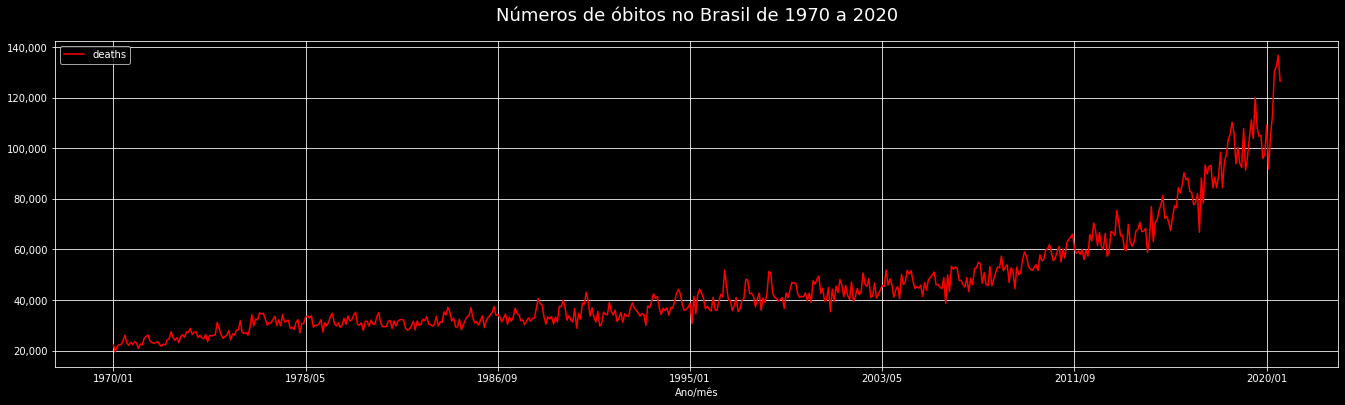

In [5]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_agrupados.plot(figsize=(23,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 1970 a 2020', fontsize=18, pad=20, color='white')

plt.show()


> É possível observar um comportamento diferente a partir de 2020. Vamos dar um zoom nos últimos 5 anos.

### Reduzindo a base para 5 anos

A redução foi realizada para facilitar a observação dos meses

In [6]:
obitos_5_anos = obitos_agrupados[-68:]
obitos_5_anos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 2015/01 to 2020/08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   deaths  68 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


### Gráfico dos últimos 5 anos

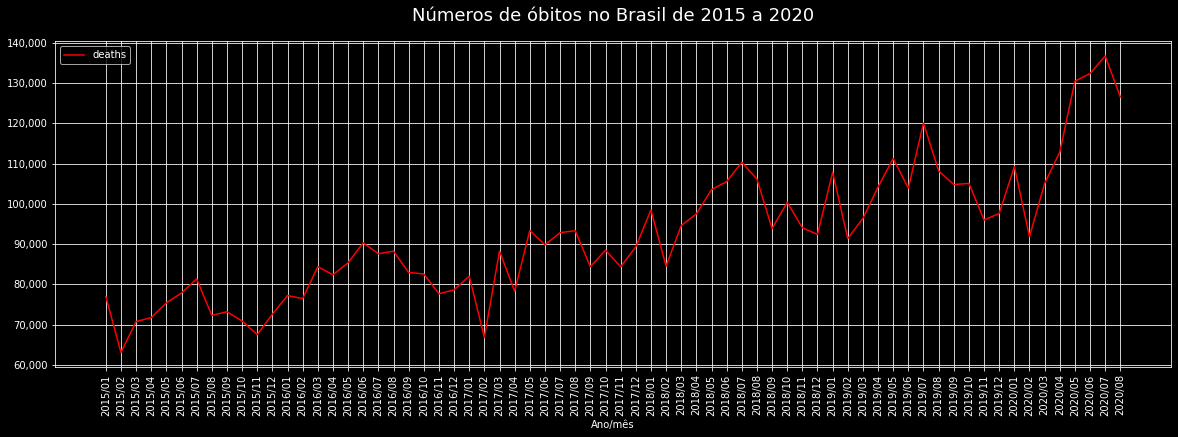

In [7]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_5_anos.plot(figsize=(20,6), colormap=palette, grid=True, alpha=1)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 2015 a 2020', fontsize=18, pad=20, color='white')

plt.xticks(rotation=90)
ax.set_xticks(range(0,68))
ax.set_xticklabels(obitos_5_anos.T.columns)


plt.show()

> É possível notar um crescimento anormal a partir de 2020, no entanto precisa ser melhor explorado. Outra constatação é que os mínimos e máximos anuais ocorrem quase sempre, respectivamente, nos meses de Fevereiro e Julho.

#### Comparando o crescimento Fevereiro -> Julho (2019 e 2020)

In [8]:
obitos_5_anos.T[['2019/02', '2019/07', '2020/02', '2020/07']]

Ano/mês,2019/02,2019/07,2020/02,2020/07
deaths,91364,120077,91860,136728


In [9]:
fev = (91860 / 91364) * 100 - 100
jul = (136728 / 120077) * 100 - 100

print(f'O número de óbitos de Fevereiro(2019-2020) variou {fev:.2f}')
print(f'O número de óbitos de Julho(2019-2020) variou {jul:.2f}')

O número de óbitos de Fevereiro(2019-2020) variou 0.54
O número de óbitos de Julho(2019-2020) variou 13.87


### Conclusões até aqui

* Importante observar que o valor **máximo** de óbitos no ano quase sempre ocorre em julho e o **mínimo** em fevereiro.

* Provavelmente o pico de óbitos em julho se justifique pelo inverno e doenças respiratórias.

* Uma outra observação é que a quantidade de óbitos de Fevereiro de 2020 foi bem próxima de Fevereiro de 2019 (acréscimo de 0,54%) enquanto o mês de julho de 2020 cresceu 13,87% em relação ao mesmo mês do ano anterior.

* Há uma tendência de aumento de óbitos a cada ano mas a diferença de crescimento entre os meses de fevereiro e julho de 2020 são relevantes.



### Geração de gráfico consideranto os meses de fevereiro e julho de cada ano

In [10]:
obitos_julho = obitos.query('month == 2 or month == 7 ')

In [11]:
obitos_agrupados_julho = obitos_julho[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados_julho.tail()

,deaths
Ano/mês,
2018/07,110316
2019/02,91364
2019/07,120077
2020/02,91860
2020/07,136728


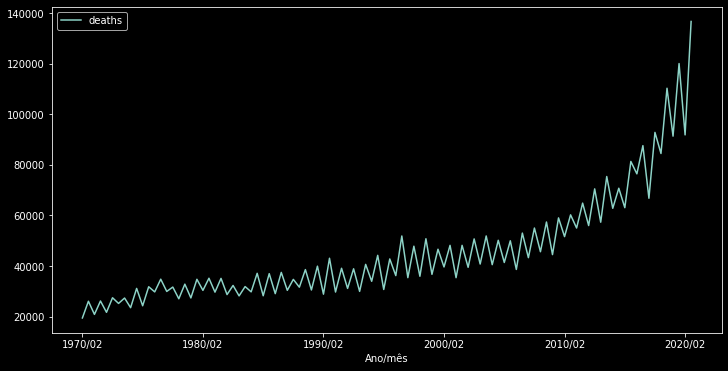

In [12]:
obitos_agrupados_julho.plot(figsize=(12,6))

> É possível observar que o crescimento entre fevereiro e julho de 2020 ocorreu de forma mais acentuada que em outros anos.

### Repetindo a análise para as 3 UFs com maior número de óbitos por habitante

<p>Uma forma que vou utilizar para explorar melhor a base de óbitos do Brasil e tentar encontrar um impacto no número de óbitos durante o período da pandemia será separar as 03 (três) UFs com maior número de óbitos de COVID por habitante e verificar o gráfico de óbitos geral para estas 3 UFs num período maior.</p>

<p>Através do Shell no Linux o arquivo original do site <a href='https://brasil.io/home/'>BRASIL.IO</a> foi reduzido para o último dia (04-11-2020) que apresentou os dados completos para as 27 UFs.</p>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/bash.png' width=200>



```
$ head -1 COVID19-BRASILIO-06-11-2020.csv > covid_2020_uf.csv
$ cat COVID19-BRASILIO-06-11-2020.csv | grep 2020-11-04 | grep state >> covid_2020_uf.csv 
```

### Transformando nosso dataset em Data Frame

In [13]:
dados_covid = pd.read_csv('https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/covid_2020_uf.csv')
dados_covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-04,AC,NaN,state,31218,696,233,False,881935,894470,12,3490.11146,0.0223
1,2020-11-04,AM,NaN,state,163399,4588,233,False,4144597,4207714,13,3883.32002,0.0281
2,2020-11-04,AL,NaN,state,91142,2254,239,False,3337357,3351543,27,2719.40417,0.0247
3,2020-11-04,DF,NaN,state,214655,3719,242,False,3015268,3055149,53,7026.00757,0.0173
4,2020-11-04,CE,NaN,state,276012,9385,234,False,9132078,9187103,23,3004.34207,0.0340


### Filtrando as colunas para o estudo

Para este estudo utilizaremos somente as colunas da UF, número de mortes e estimativa da população daquela UF.

In [14]:
covid_deaths = dados_covid[['state', 'deaths', 'estimated_population']]

> Criando uma nova coluna com o número de óbitos por habitante e ordenando em ordem decrescente para identificar as 3 UFs com maiores números de óbitos por habitantes. 

In [15]:
covid_deaths['obitos_por_habitantes'] = covid_deaths['deaths'] / covid_deaths['estimated_population']
covid_deaths.sort_values('obitos_por_habitantes', ascending=False).head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state,deaths,estimated_population,obitos_por_habitantes
3,DF,3719,3055149,0.001217
17,RJ,20759,17366189,0.001195
10,MT,3883,3526220,0.001101


> Trabalharemos com as UFs: DF, RJ e MT, por apresentarem o maior número de óbitos por habitantes.

---



In [16]:
obitos_agrupados_df = obitos[['Ano/mês', 'deaths', 'state']].query('state == "DF"')
obitos_agrupados_rj = obitos[['Ano/mês', 'deaths', 'state']].query('state == "RJ"')
obitos_agrupados_mt = obitos[['Ano/mês', 'deaths', 'state']].query('state == "MT"')

print(f'DF {len(obitos_agrupados_df)} registros')
print(f'RJ {len(obitos_agrupados_rj)} registros')
print(f'MT {len(obitos_agrupados_mt)} registros')

DF 608 registros
RJ 608 registros
MT 535 registros


> As 3 UFs estão com quantidade de meses diferentes. Para uma análise comparativa e melhor visualização, será preciso selecionar um período que a base esteja igual para as 3 UFs.

In [17]:
obitos_agrupados_mt.head()

,Ano/mês,deaths,state
319,1971/07,1,MT
1389,1976/01,6,MT
1410,1976/02,13,MT
1434,1976/03,15,MT
1456,1976/04,11,MT


> Analisando o dataset é possível observar que o estado do Mato Grosso inicia o registro em julho de 1971, pula para 1976 e em 1978 faltam dois meses. Portanto vamos trabalhar com os dados a partir de 1979.

In [18]:
obitos_agrupados_mt.head(36).tail(12)

,Ano/mês,deaths,state
1917,1977/12,20,MT
1939,1978/01,1,MT
2001,1978/04,1,MT
2023,1978/05,5,MT
2046,1978/06,9,MT
2068,1978/07,16,MT
2092,1978/08,7,MT
2114,1978/09,6,MT
2137,1978/10,8,MT
2158,1978/11,13,MT


In [19]:
obitos_df_1979 = obitos_agrupados_df[108:]
obitos_rj_1979 = obitos_agrupados_rj[108:]
obitos_mt_1979 = obitos_agrupados_mt[35:]

# Função para verificar os Data Frames:

def verifica_dataframe(data):
    inicio = data['Ano/mês'].head(1).values[0]
    tamanho = len(data)
    nome = data['state'].head(1).values[0]
    print(f'O DataFrame {nome} inicia com {inicio} e tem {tamanho} registros.')


verifica_dataframe(obitos_df_1979)
verifica_dataframe(obitos_rj_1979)
verifica_dataframe(obitos_mt_1979)

O DataFrame DF inicia com 1979/01 e tem 500 registros.
O DataFrame RJ inicia com 1979/01 e tem 500 registros.
O DataFrame MT inicia com 1979/01 e tem 500 registros.


> Agora temos as três UFs com a mesma quantidade de registros

### Gráfico comparativo das 3 UFs

In [20]:
# Seleção das colunas para serem utilizadas no gráfico

colunas = obitos_mt_1979.set_index('Ano/mês').T.columns
colunas = tuple(colunas[::12])

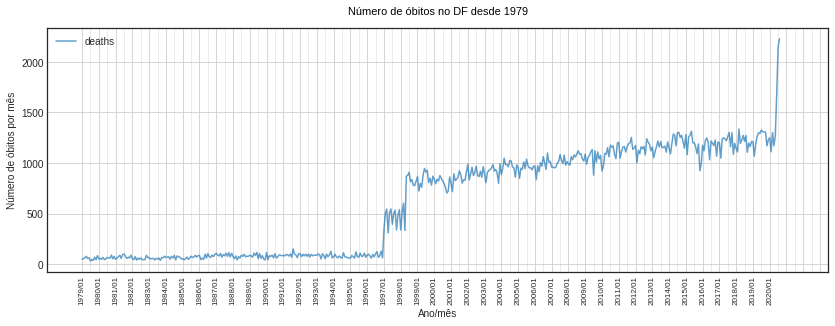

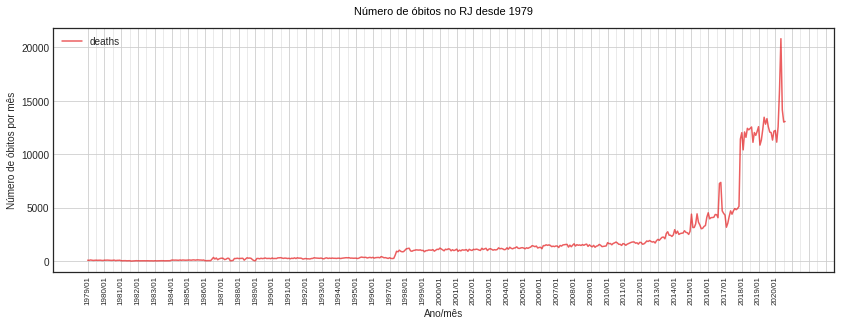

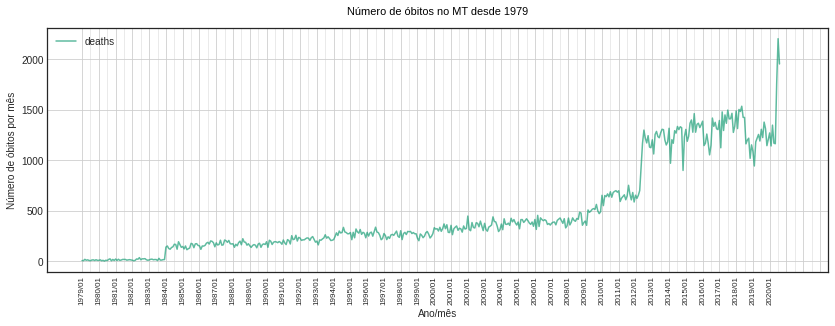

In [21]:
# Estilo
plt.style.use('seaborn-white')


# Criando a paleta de cores
cor_a = plt.get_cmap('tab10')
cor_b = plt.get_cmap('Set1')
cor_c = plt.get_cmap('Dark2')

# Configurações

def config(axy, data, uf, cor):
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 540, 12)
    minor_ticks = np.arange(0, 540, 6)

    axy = data.plot(x='Ano/mês', alpha= .7, kind='line', colormap=cor, grid=True, figsize=(14,4.5))
    axy.set_ylabel('Número de óbitos por mês')
    axy.set_title(f'Número de óbitos no {uf} desde 1979', fontsize=11, pad=13, color='black')
    axy.set_xticks(major_ticks)
    axy.set_xticks(minor_ticks, minor=True)

    # And a corresponding grid
    axy.grid(which='both')

    # Or if you want different settings for the grids:
    axy.grid(which='minor', alpha=0.5)
    axy.grid(which='major', alpha=1.0)

    plt.xticks(major_ticks, colunas)
    plt.xticks(rotation=90, fontsize=8)
    


# Gerando os gráficos:

config('ax1', obitos_df_1979, 'DF', cor_a)
config('ax2', obitos_rj_1979, 'RJ', cor_b)
config('ax2', obitos_mt_1979, 'MT', cor_c)


plt.show()

## Conclusão Final

* Foi possível observar que a pandemia tem gerado um forte crescimento de óbitos quando comparamos com os anos anteriores de nossa base histórica (1979-2020), direta ou indiretamente. E isso ficou mais evidentes nas UFs mais afetadas.

* Independente da base das mortes por COVID-19, independente se há pessoas morrendo sem que fique registrada a verdadeira causa, o número total de óbitos por mês no Brasil demonstra o tamanho do impacto da pandemia no nosso povo, e mais acentuada nos estados que foram mais atingidos pela pandemia, independente de nossas crenças ou ideologias partidárias.

* Vamos todos morrer um dia, essa é a lei da vida, mas a pandemia tem gerado um grande impacto nas famílias brasileiras (e mundiais) e não teríamos esse número de óbitos sem a pandemia.

* Meu pai faleceu no dia 13 de abril de 2020 com problemas respiratórios no interior do estado do Rio de Janeiro, como moro em Brasília não houve tempo hábil para participar do velório dele, seja pela falta de voos, seja pela forma como os velórios estavam sendo efetuados.

---
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/bbc.png'>

## Fontes:
---

* https://oglobo.globo.com/sociedade/distanciamento-uso-de-mascaras-contra-covid-19-derrubam-casos-de-outras-doencas-respiratorias-no-pais-24682125

* https://www.brasil247.com/coronavirus/a-cada-dois-obitos-pela-covid-19-nos-eua-uma-terceira-pessoa-morre-pelos-efeitos-indiretos-da-doenca

* https://www.bbc.com/portuguese/brasil-54902608

